# Terphenyl Heteropolymer Analysis Notebook

In this notebook I will perform several data analysis on the RHH terphenyl octamer. This molecule has 3 aromatic moieties connected with peptide-linkers. Collaborators in the Gellman group, at U Wisc-Ma., have been trying to synthesize and characterize this molecule. This would represent a novel type of foldamer molecule.

## Replica Exchange Energy Distributions

For replica exchange data, it is imporant to see the overlap of energy states from each replica. For this reason we will look at the histogram of energies from each simulation and confirm that energies each replica is behaving as expected.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import panedr
import matplotlib.pyplot as plt
import numpy as np
import os
import pymbar
import analysis_library
from scipy.constants import physical_constants, find

plt.style.use('ggplot')

In [3]:
energy_df = panedr.edr_to_df("/mnt/summit/simulations/octamer_Rchiral/RHH/remd_sim/sim0/npt.edr")
energy_df.head()

,Time,Bond,Angle,Proper Dih.,LJ-14,Coulomb-14,LJ (SR),Disper. corr.,Coulomb (SR),Coul. recip.,...,Pres-YZ,Pres-ZX,Pres-ZY,Pres-ZZ,#Surf*SurfTen,Box-Vel-XX,Box-Vel-YY,Box-Vel-ZZ,T-System,Lamb-System
0.0,0.0,3821.400879,15195.199219,515.260437,591.994446,-1047.726929,1063.418091,-28.662003,-5275.471191,1292.465820,...,115.141861,347.244385,115.143845,176.696198,615.206055,0.000000,0.000000,0.000000,226.623932,1.0
100.0,100.0,3951.689697,14925.915039,493.858887,582.200317,-1057.283936,-24041.978516,-10.134899,-4304.611328,302.315979,...,167.786377,105.012726,167.786377,368.049103,-1063.313721,0.000116,0.000116,0.000116,226.282211,1.0
200.0,200.0,3756.028809,15100.609375,495.191223,623.182983,-1056.179810,-23884.673828,-10.070463,-4301.423340,353.991455,...,48.791668,-49.580032,48.792316,348.390808,2802.044678,-0.002121,-0.002121,-0.002121,226.030457,1.0
300.0,300.0,3997.822266,15091.799805,504.088470,599.458862,-1050.571289,-24100.880859,-10.120700,-4341.618652,328.393677,...,-19.702532,373.134125,-19.701366,31.240614,726.304626,0.001995,0.001995,0.001995,223.546173,1.0
400.0,400.0,3760.550781,15026.639648,522.764282,570.192627,-1057.086914,-23996.125000,-10.100462,-4421.774414,332.130920,...,-4.289162,78.835785,-4.288706,482.891907,2405.204102,0.002528,0.002528,0.002528,225.371780,1.0


In [4]:
energy_df.keys()

Index(['Time', 'Bond', 'Angle', 'Proper Dih.', 'LJ-14', 'Coulomb-14',
       'LJ (SR)', 'Disper. corr.', 'Coulomb (SR)', 'Coul. recip.', 'LJ recip.',
       'Potential', 'Kinetic En.', 'Total Energy', 'Conserved En.',
       'Temperature', 'Pres. DC', 'Pressure', 'Constr. rmsd', 'Box-X', 'Box-Y',
       'Box-Z', 'Volume', 'Density', 'pV', 'Enthalpy', 'Vir-XX', 'Vir-XY',
       'Vir-XZ', 'Vir-YX', 'Vir-YY', 'Vir-YZ', 'Vir-ZX', 'Vir-ZY', 'Vir-ZZ',
       'Pres-XX', 'Pres-XY', 'Pres-XZ', 'Pres-YX', 'Pres-YY', 'Pres-YZ',
       'Pres-ZX', 'Pres-ZY', 'Pres-ZZ', '#Surf*SurfTen', 'Box-Vel-XX',
       'Box-Vel-YY', 'Box-Vel-ZZ', 'T-System', 'Lamb-System'],
      dtype='object')

In [5]:
# Extract Potential Energies from each simulation
sim_dir_name = "sim"
path = "/mnt/summit/simulations/octamer_Rchiral/RHH/remd_sim/"
n_replicas = 20

energies, temps = analysis_library.get_energies(sim_dir_name, path, n_replicas)

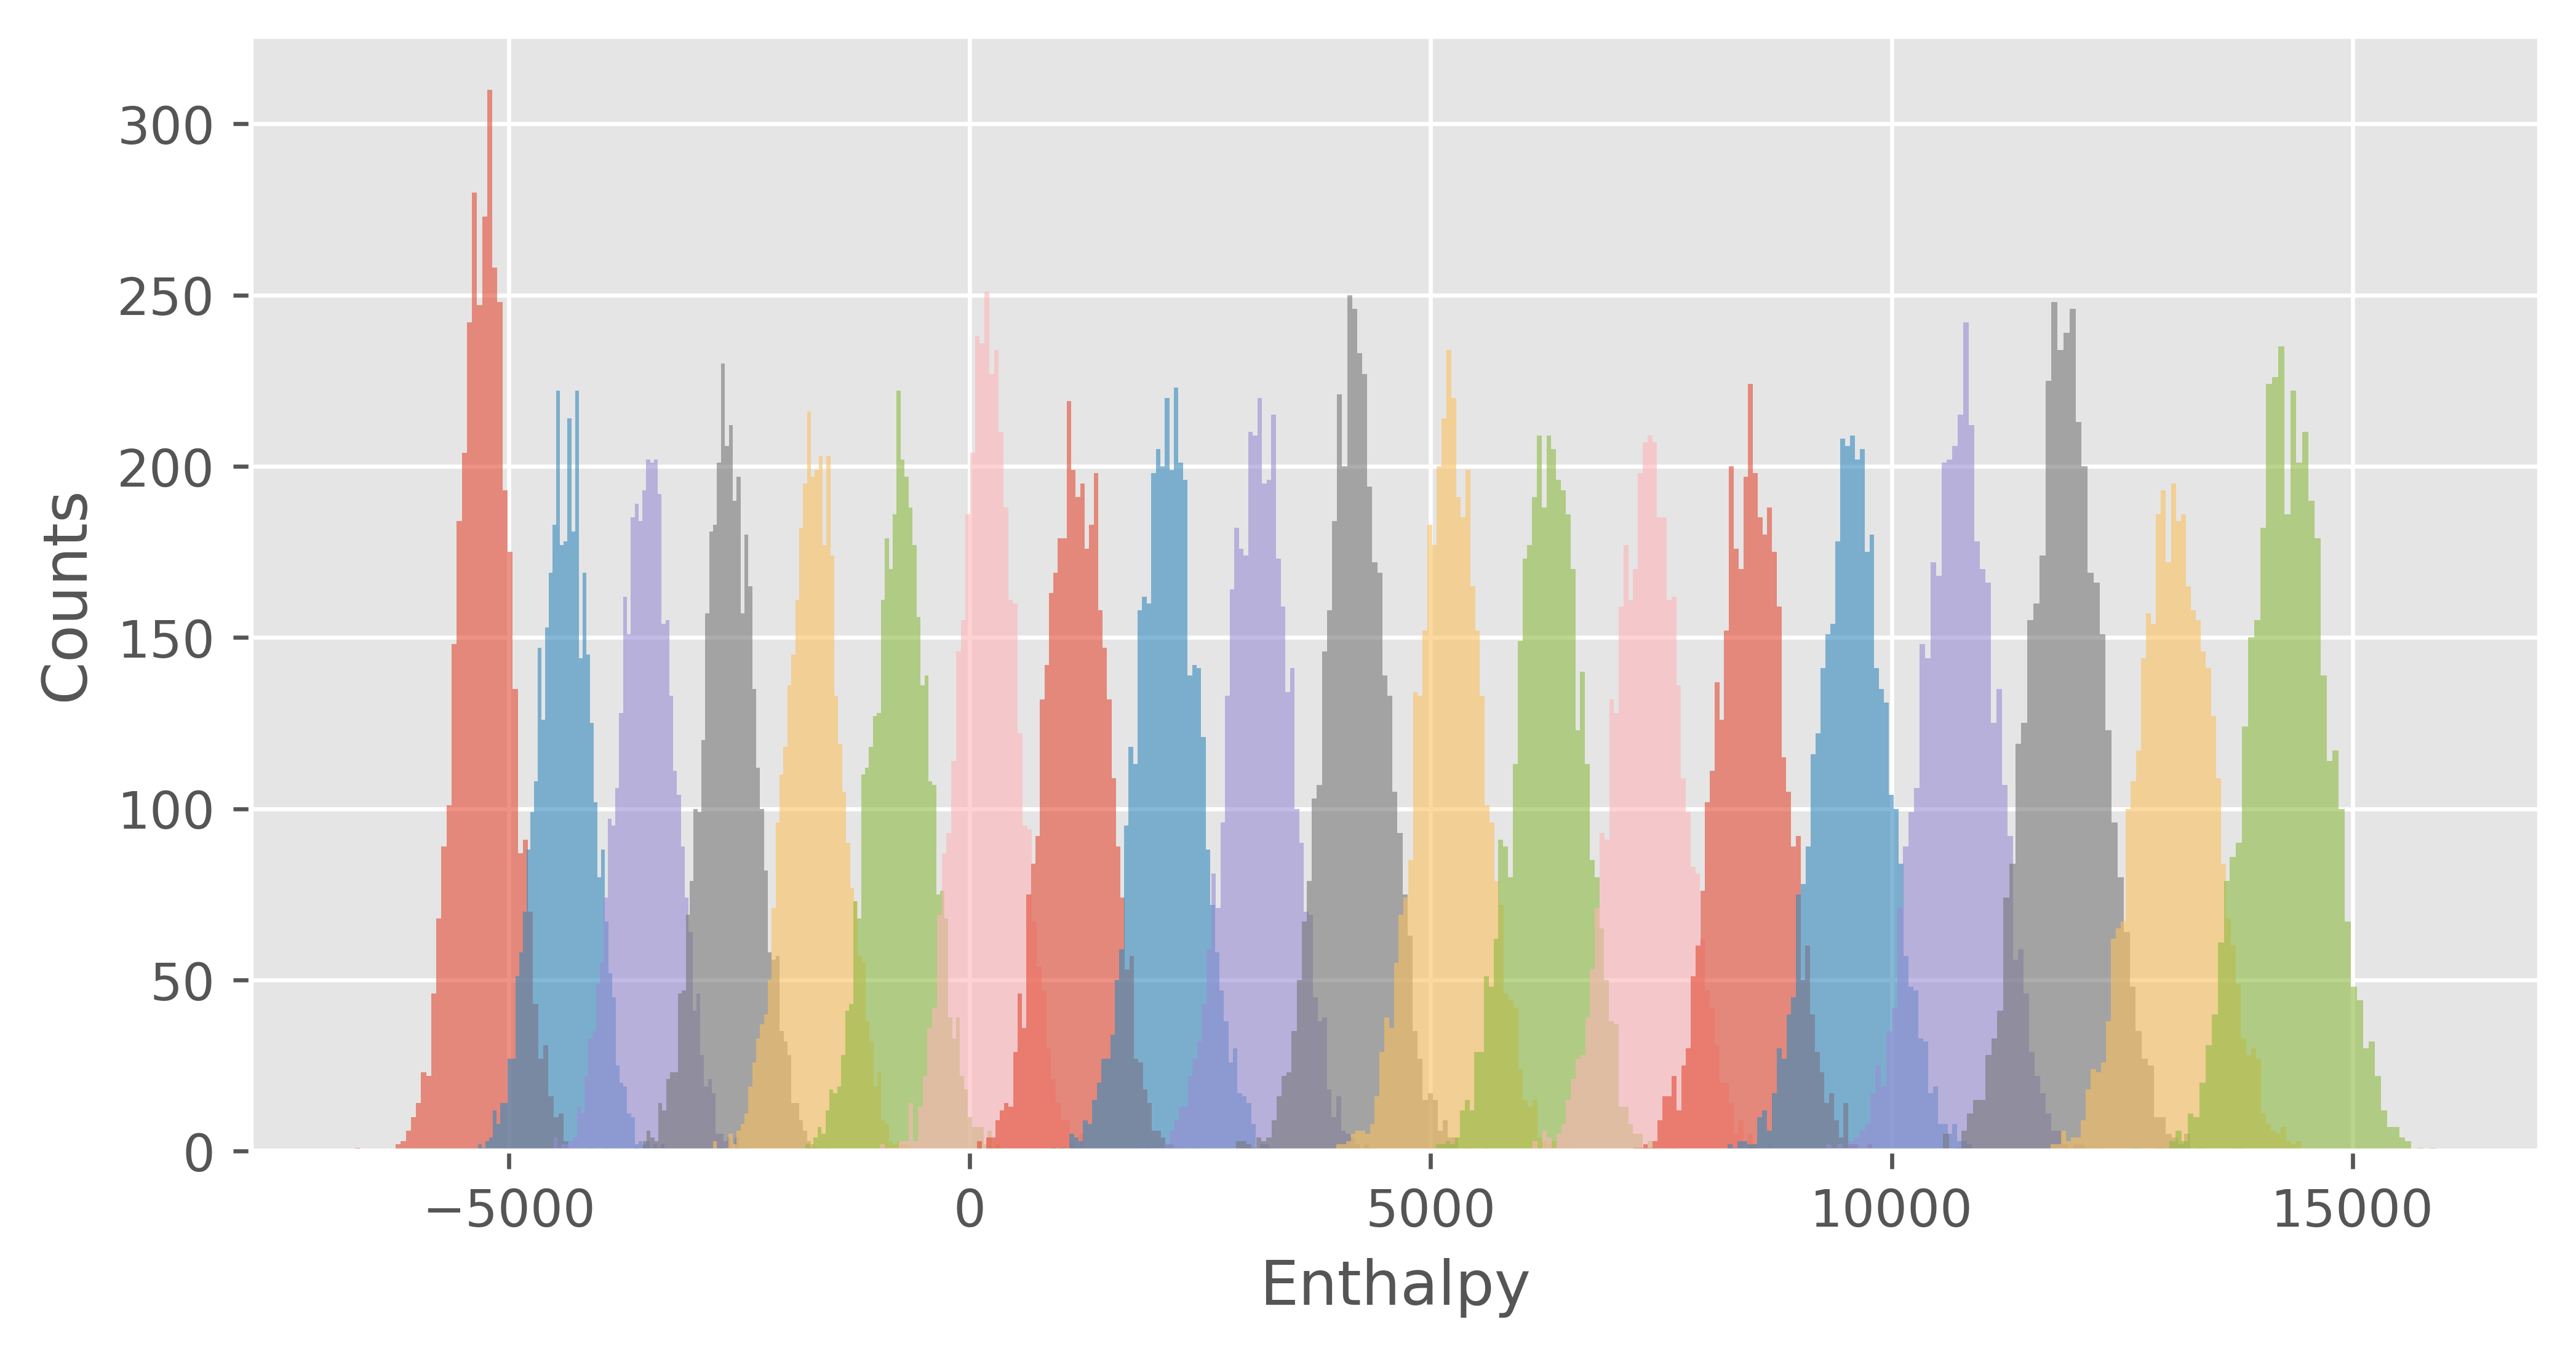

In [6]:
plt.figure(figsize=[8,4], dpi=600)
for i in range(len(temps)):
    # requires cutting off outlier (likely initial frame)
    plt.hist(energies[i][energies[i] > np.min(energies[i])], bins = 50, alpha = 0.6)
    plt.xlabel("Enthalpy")
    plt.ylabel("Counts")
# plt.legend([str(np.round(t, 1)) for t in temps])

In [7]:
for i in range(len(temps) - 1):
    print("Delta beta:", 1/np.array(temps[i]) - 1/np.array(temps[i + 1]))

Delta beta: 8.51904480296357e-05
Delta beta: 8.355753023164998e-05
Delta beta: 8.19559119583967e-05
Delta beta: 8.038499326525235e-05
Delta beta: 7.884418570724971e-05
Delta beta: 7.73329121186413e-05
Delta beta: 7.585060639670382e-05
Delta beta: 7.439671328969815e-05
Delta beta: 7.297068818885345e-05
Delta beta: 7.157199692439057e-05
Delta beta: 7.020011556540867e-05
Delta beta: 6.885453022363944e-05
Delta beta: 6.753473686095003e-05
Delta beta: 6.624024110053186e-05
Delta beta: 6.4970558041718e-05
Delta beta: 6.372521207834939e-05
Delta beta: 6.250373672060834e-05
Delta beta: 6.130567442028849e-05
Delta beta: 6.013057639939765e-05


## Heat Capacity Curve

The nice thing about replica exchange simulations is we can compute the change of a systems heat capacity with temperature.This is especially useful for systems that experience large surface area changes during phase transistions, such as protein folding or melting transitions.

We'll be implementing heat capacity equation, using enthalpy:

$$C_p = \frac{d<H>}{dT}$$

We'll be calculating expectation heat capacities using the following formulas:



In [43]:
u_kln, n_samples, t_list, betas = analysis_library.construct_u_kln_matrix(temps, energies, add_temps = np.linspace(225, 325, 200))

In [44]:
# MBAR
mbar = pymbar.MBAR(u_kln, n_samples, verbose = True, relative_tolerance = 1e-10, initial_f_k= None, maximum_iterations=1000)

K (total states) = 220, total samples = 73500

They are therefore likely to to be the same thermodynamic state.  This can occasionally cause
numerical problems with computing the covariance of their energy difference, which must be
identically zero in any case. Consider combining them into a single state.


They are therefore likely to to be the same thermodynamic state.  This can occasionally cause
numerical problems with computing the covariance of their energy difference, which must be
identically zero in any case. Consider combining them into a single state.

N_k = 
[3675 3675 3675 3675 3675 3675 3675 3675 3675 3675 3675 3675 3675 3675
 3675 3675 3675 3675 3675 3675    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0   

In [45]:
# Building potential energy kln matrix
E_kln = u_kln
for k in range(u_kln.shape[1]):
    E_kln[:,k,:] *= betas[k]**(-1)

# mean and variance of energy
results = mbar.computeExpectations(E_kln, state_dependent=True, return_dict=True)
E_expected = results['mu']
dE_exoected = results['sigma']

In [46]:
# mean and variance of difference of energies
results = mbar.computeExpectations(E_kln, output='differences', state_dependent=True, return_dict=True)
DeltaE_expected = results['mu']
dDeltaE_expected = results['sigma']

In [47]:
# mean and variance of energies squared
results = mbar.computeExpectations(E_kln**2, state_dependent=True, return_dict=True)
E2_expected = results['mu']
dE2_expected = results['sigma']

In [48]:
kb = physical_constants["Boltzmann constant"][0] *  physical_constants["Avogadro constant"][0] / 1000 # J (molK)^-1

Cp_expect = (E2_expected - (E_expected*E_expected)) / (kb * t_list**2)

Text(0.5, 0, 'Temperature (K)')

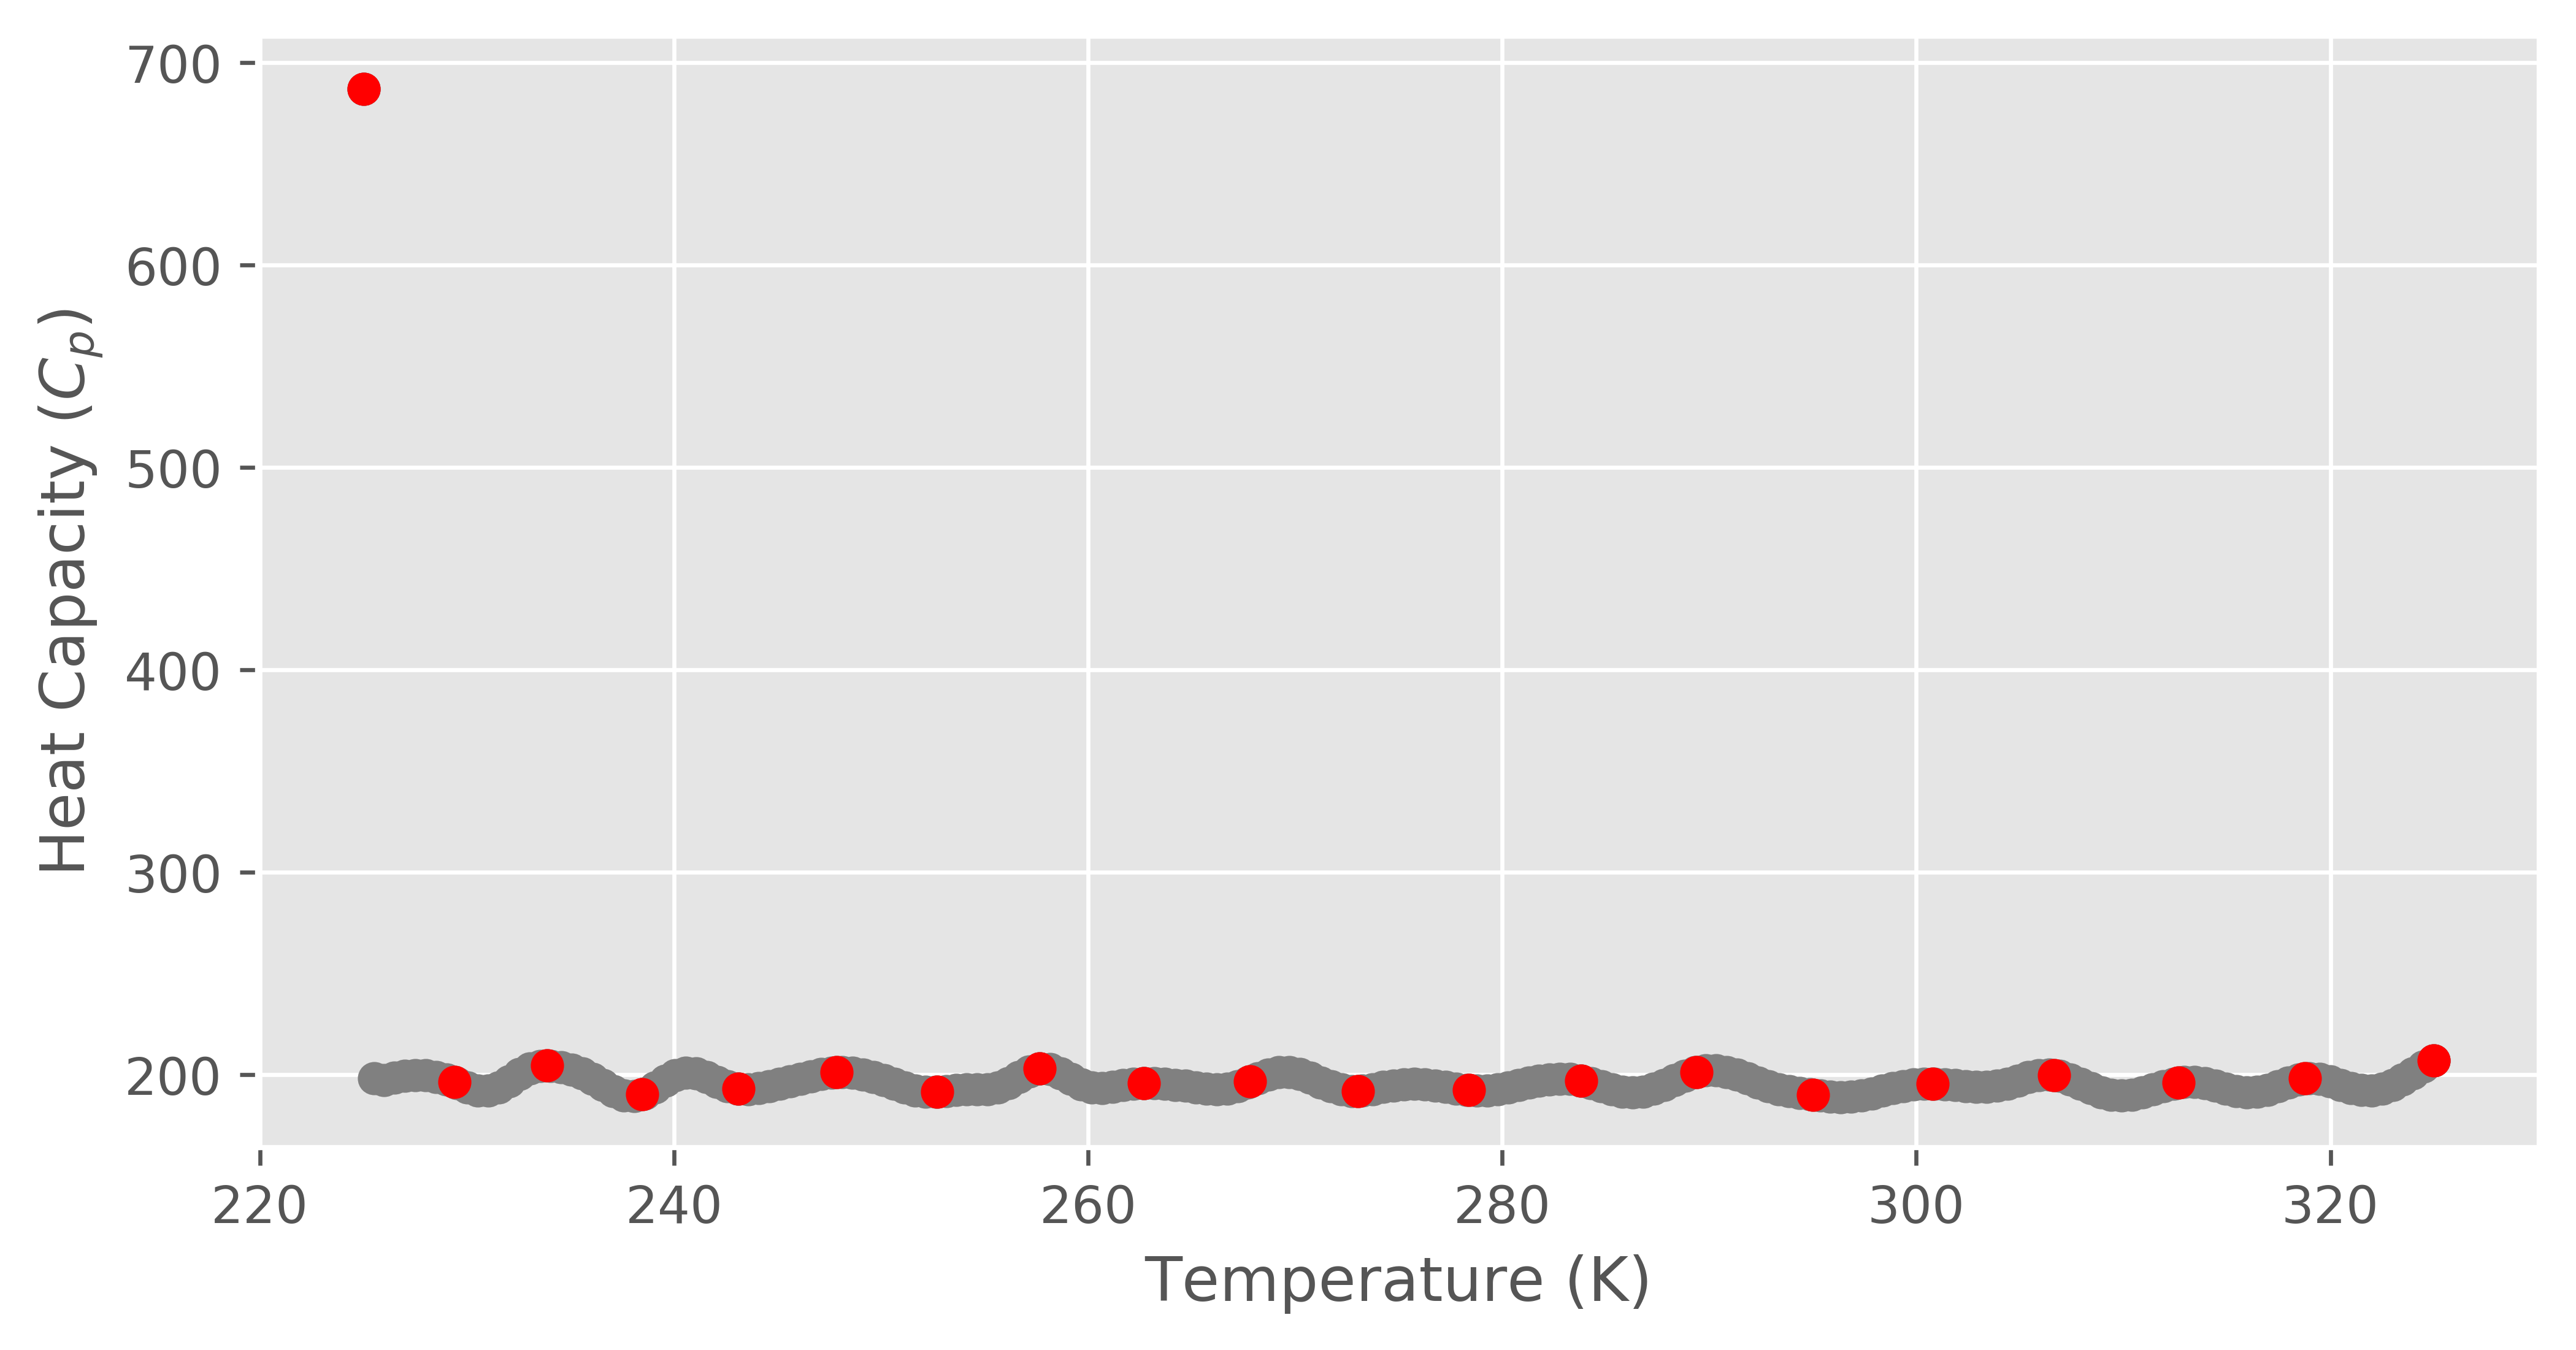

In [49]:
plt.figure(figsize=[8,4], dpi=600)
plt.scatter(t_list, Cp_expect, color = "gray")
plt.scatter(t_list[:20], Cp_expect[:20], color = "red")
plt.ylabel("Heat Capacity ($C_p$)")
plt.xlabel("Temperature (K)")

## Bootstrapping Cp Results

We can use bootstrapping to generate uncertainties in our data set.

In [50]:
# Attempted to multiprocess the MBAR Bootstrapping
# But it appears that the optimizations in pymbar parallelize to use all processors
# Or the single process of mbar is extremely memory intensive

def cp_bootstrap(j):
    print("Working on bootstrap", j,"...")
    t1 = time.time()
    energies_boot = []
    for i in range(len(energies)):
        energies_boot.append(np.random.choice(energies[i], size=len(energies[i])))
    # Solve MBAR equations
    u_kln_boot, n_samples_boot, t_list_boot, betas_boot = analysis_library.construct_u_kln_matrix(temps, energies_boot, add_temps = np.linspace(230, 325, 200))
    mbar_boot = pymbar.MBAR(u_kln_boot, n_samples_boot, verbose = False, relative_tolerance = 1e-10, initial_f_k= None, maximum_iterations=1000)
    # Compute expectations and variance of relevant terms
    E_kln_boot = u_kln_boot
    for k in range(u_kln_boot.shape[1]):
        E_kln_boot[:,k,:] *= betas_boot[k]**(-1)
    results = mbar_boot.computeExpectations(E_kln_boot, state_dependent=True, return_dict=True)
    E_expected = results['mu']
    results = mbar_boot.computeExpectations(E_kln_boot**2, state_dependent=True, return_dict=True)
    E2_expected = results['mu']
    # compute boot strap cp
    t2 = time.time()
    print("bootstraj", j, "took", t2-t1, "seconds")
    return((E2_expected - (E_expected*E_expected)) / (kb * t_list**2))
    

In [51]:
from multiprocessing import Pool
import time

N_boots = 100
pool = Pool(2)

cp_boot = pool.map(cp_bootstrap, range(N_boots))

Working on bootstrap 0 ...
Working on bootstrap 13 ...
bootstraj 13 took 26.06324815750122 seconds
bootstraj 0 took 26.05831551551819 seconds
Working on bootstrap 1 ...
Working on bootstrap 14 ...
bootstraj 14 took 9.153406620025635 seconds
Working on bootstrap 15 ...
bootstraj 1 took 9.360894918441772 seconds
Working on bootstrap 2 ...
bootstraj 15 took 8.4147367477417 seconds
Working on bootstrap 16 ...
bootstraj 2 took 8.525516986846924 seconds
Working on bootstrap 3 ...
bootstraj 16 took 8.31272292137146 seconds
Working on bootstrap 17 ...
bootstraj 3 took 8.287312746047974 seconds
Working on bootstrap 4 ...
bootstraj 17 took 8.789278030395508 seconds
Working on bootstrap 18 ...
bootstraj 4 took 8.955981254577637 seconds
Working on bootstrap 5 ...
bootstraj 18 took 9.122117042541504 seconds
bootstraj 5 took 8.802697658538818 seconds
Working on bootstrap 19 ...
Working on bootstrap 6 ...
bootstraj 6 took 8.793184280395508 seconds
Working on bootstrap 7 ...
bootstraj 19 took 9.042681

bootstraj 21 took 8.574260950088501 seconds
Working on bootstrap 22 ...
bootstraj 9 took 8.817642211914062 seconds
Working on bootstrap 10 ...
bootstraj 22 took 8.887571811676025 seconds
Working on bootstrap 23 ...
bootstraj 10 took 8.499597072601318 seconds
Working on bootstrap 11 ...
bootstraj 23 took 8.725427865982056 seconds
Working on bootstrap 24 ...
bootstraj 11 took 8.174272537231445 seconds
Working on bootstrap 12 ...
bootstraj 24 took 8.040836572647095 seconds
Working on bootstrap 25 ...
bootstraj 12 took 8.794058322906494 seconds
Working on bootstrap 26 ...
bootstraj 25 took 8.800484418869019 seconds
Working on bootstrap 39 ...
bootstraj 26 took 8.596644163131714 seconds
Working on bootstrap 27 ...
bootstraj 39 took 9.04765772819519 seconds
Working on bootstrap 40 ...
bootstraj 27 took 9.016496896743774 seconds
Working on bootstrap 28 ...
bootstraj 40 took 9.156345129013062 seconds
Working on bootstrap 41 ...
bootstraj 28 took 8.47847843170166 seconds
Working on bootstrap 29

Working on bootstrap 31 ...
bootstraj 43 took 8.238040447235107 seconds
Working on bootstrap 44 ...
bootstraj 31 took 8.51726770401001 seconds
Working on bootstrap 32 ...
bootstraj 44 took 8.607840776443481 seconds
Working on bootstrap 45 ...
bootstraj 32 took 8.663317203521729 seconds
Working on bootstrap 33 ...
bootstraj 45 took 8.679978132247925 seconds
Working on bootstrap 46 ...
bootstraj 33 took 8.854636907577515 seconds
Working on bootstrap 34 ...
bootstraj 46 took 8.823730945587158 seconds
Working on bootstrap 47 ...
bootstraj 34 took 8.338082790374756 seconds
Working on bootstrap 35 ...
bootstraj 47 took 8.344746112823486 seconds
Working on bootstrap 48 ...
bootstraj 35 took 8.305100202560425 seconds
Working on bootstrap 36 ...
bootstraj 48 took 8.202095031738281 seconds
Working on bootstrap 49 ...
bootstraj 36 took 8.17219352722168 seconds
Working on bootstrap 37 ...
bootstraj 49 took 8.229363918304443 seconds
Working on bootstrap 50 ...
bootstraj 37 took 8.530367612838745 se

bootstraj 52 took 8.428593397140503 seconds
Working on bootstrap 53 ...
bootstraj 65 took 8.247392654418945 seconds
Working on bootstrap 66 ...
bootstraj 53 took 8.372085094451904 seconds
Working on bootstrap 54 ...
bootstraj 66 took 8.272245645523071 seconds
Working on bootstrap 67 ...
bootstraj 54 took 8.704704523086548 seconds
Working on bootstrap 55 ...
bootstraj 67 took 8.701828002929688 seconds
Working on bootstrap 68 ...
bootstraj 55 took 8.831525087356567 seconds
Working on bootstrap 56 ...
bootstraj 68 took 8.894205570220947 seconds
Working on bootstrap 69 ...
bootstraj 56 took 8.868801355361938 seconds
Working on bootstrap 57 ...
bootstraj 69 took 8.870962619781494 seconds
Working on bootstrap 70 ...
bootstraj 57 took 8.78792119026184 seconds
Working on bootstrap 58 ...
bootstraj 70 took 8.756667613983154 seconds
Working on bootstrap 71 ...
bootstraj 58 took 8.89503812789917 seconds
Working on bootstrap 59 ...
bootstraj 71 took 9.053377151489258 seconds
Working on bootstrap 7

bootstraj 61 took 8.531889915466309 seconds
bootstraj 74 took 8.459206104278564 seconds
Working on bootstrap 62 ...
Working on bootstrap 75 ...
bootstraj 62 took 8.564512491226196 seconds
Working on bootstrap 63 ...
bootstraj 75 took 8.657159090042114 seconds
Working on bootstrap 76 ...
bootstraj 63 took 8.618958234786987 seconds
Working on bootstrap 64 ...
bootstraj 76 took 8.662651777267456 seconds
Working on bootstrap 77 ...
bootstraj 64 took 8.707301378250122 seconds
Working on bootstrap 78 ...
bootstraj 77 took 8.799634218215942 seconds
Working on bootstrap 91 ...
bootstraj 78 took 8.518663883209229 seconds
Working on bootstrap 79 ...
bootstraj 91 took 8.4148588180542 seconds
Working on bootstrap 92 ...
bootstraj 79 took 8.565326452255249 seconds
Working on bootstrap 80 ...
bootstraj 92 took 8.672868728637695 seconds
Working on bootstrap 93 ...
bootstraj 80 took 8.25542163848877 seconds
Working on bootstrap 81 ...
bootstraj 93 took 8.333895444869995 seconds
Working on bootstrap 94

bootstraj 83 took 8.841830492019653 seconds
Working on bootstrap 84 ...
bootstraj 96 took 9.106504201889038 seconds
Working on bootstrap 97 ...
bootstraj 84 took 8.687132835388184 seconds
Working on bootstrap 85 ...
bootstraj 97 took 8.617899894714355 seconds
Working on bootstrap 98 ...
bootstraj 85 took 8.405303478240967 seconds
Working on bootstrap 86 ...
bootstraj 98 took 8.395317077636719 seconds
Working on bootstrap 99 ...
bootstraj 86 took 8.417154550552368 seconds
Working on bootstrap 87 ...
bootstraj 99 took 8.473313331604004 seconds
bootstraj 87 took 6.897303581237793 seconds
Working on bootstrap 88 ...
bootstraj 88 took 6.640319347381592 seconds
Working on bootstrap 89 ...
bootstraj 89 took 6.561420917510986 seconds
Working on bootstrap 90 ...
bootstraj 90 took 6.5840582847595215 seconds


Process ForkPoolWorker-5:
Process ForkPoolWorker-6:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing/que

In [57]:
cp_boot = np.array(cp_boot)

In [58]:
mu_cp_boot = np.mean(cp_boot, axis = 0)
sigma_cp_boot = np.std(cp_boot, axis = 0)

In [59]:
cp_boot

array([[816.84375574, 200.52500541, 204.2893033 , ..., 197.81932879,
        199.95032674, 202.33301342],
       [517.71605635, 197.94234334, 204.96491598, ..., 196.5859521 ,
        199.26297359, 202.39866998],
       [517.52382739, 195.28844395, 197.84117888, ..., 199.74427872,
        203.94056519, 208.33522742],
       ...,
       [621.895896  , 192.78031705, 208.35067141, ..., 203.07642903,
        204.53437109, 206.20403795],
       [628.99321488, 198.16065368, 202.52806093, ..., 201.02236461,
        206.34394505, 210.9360291 ],
       [791.03024971, 196.62754225, 207.81560883, ..., 203.36925674,
        207.41457888, 210.76896146]])

Text(0.5, 0, 'Temperature (K)')

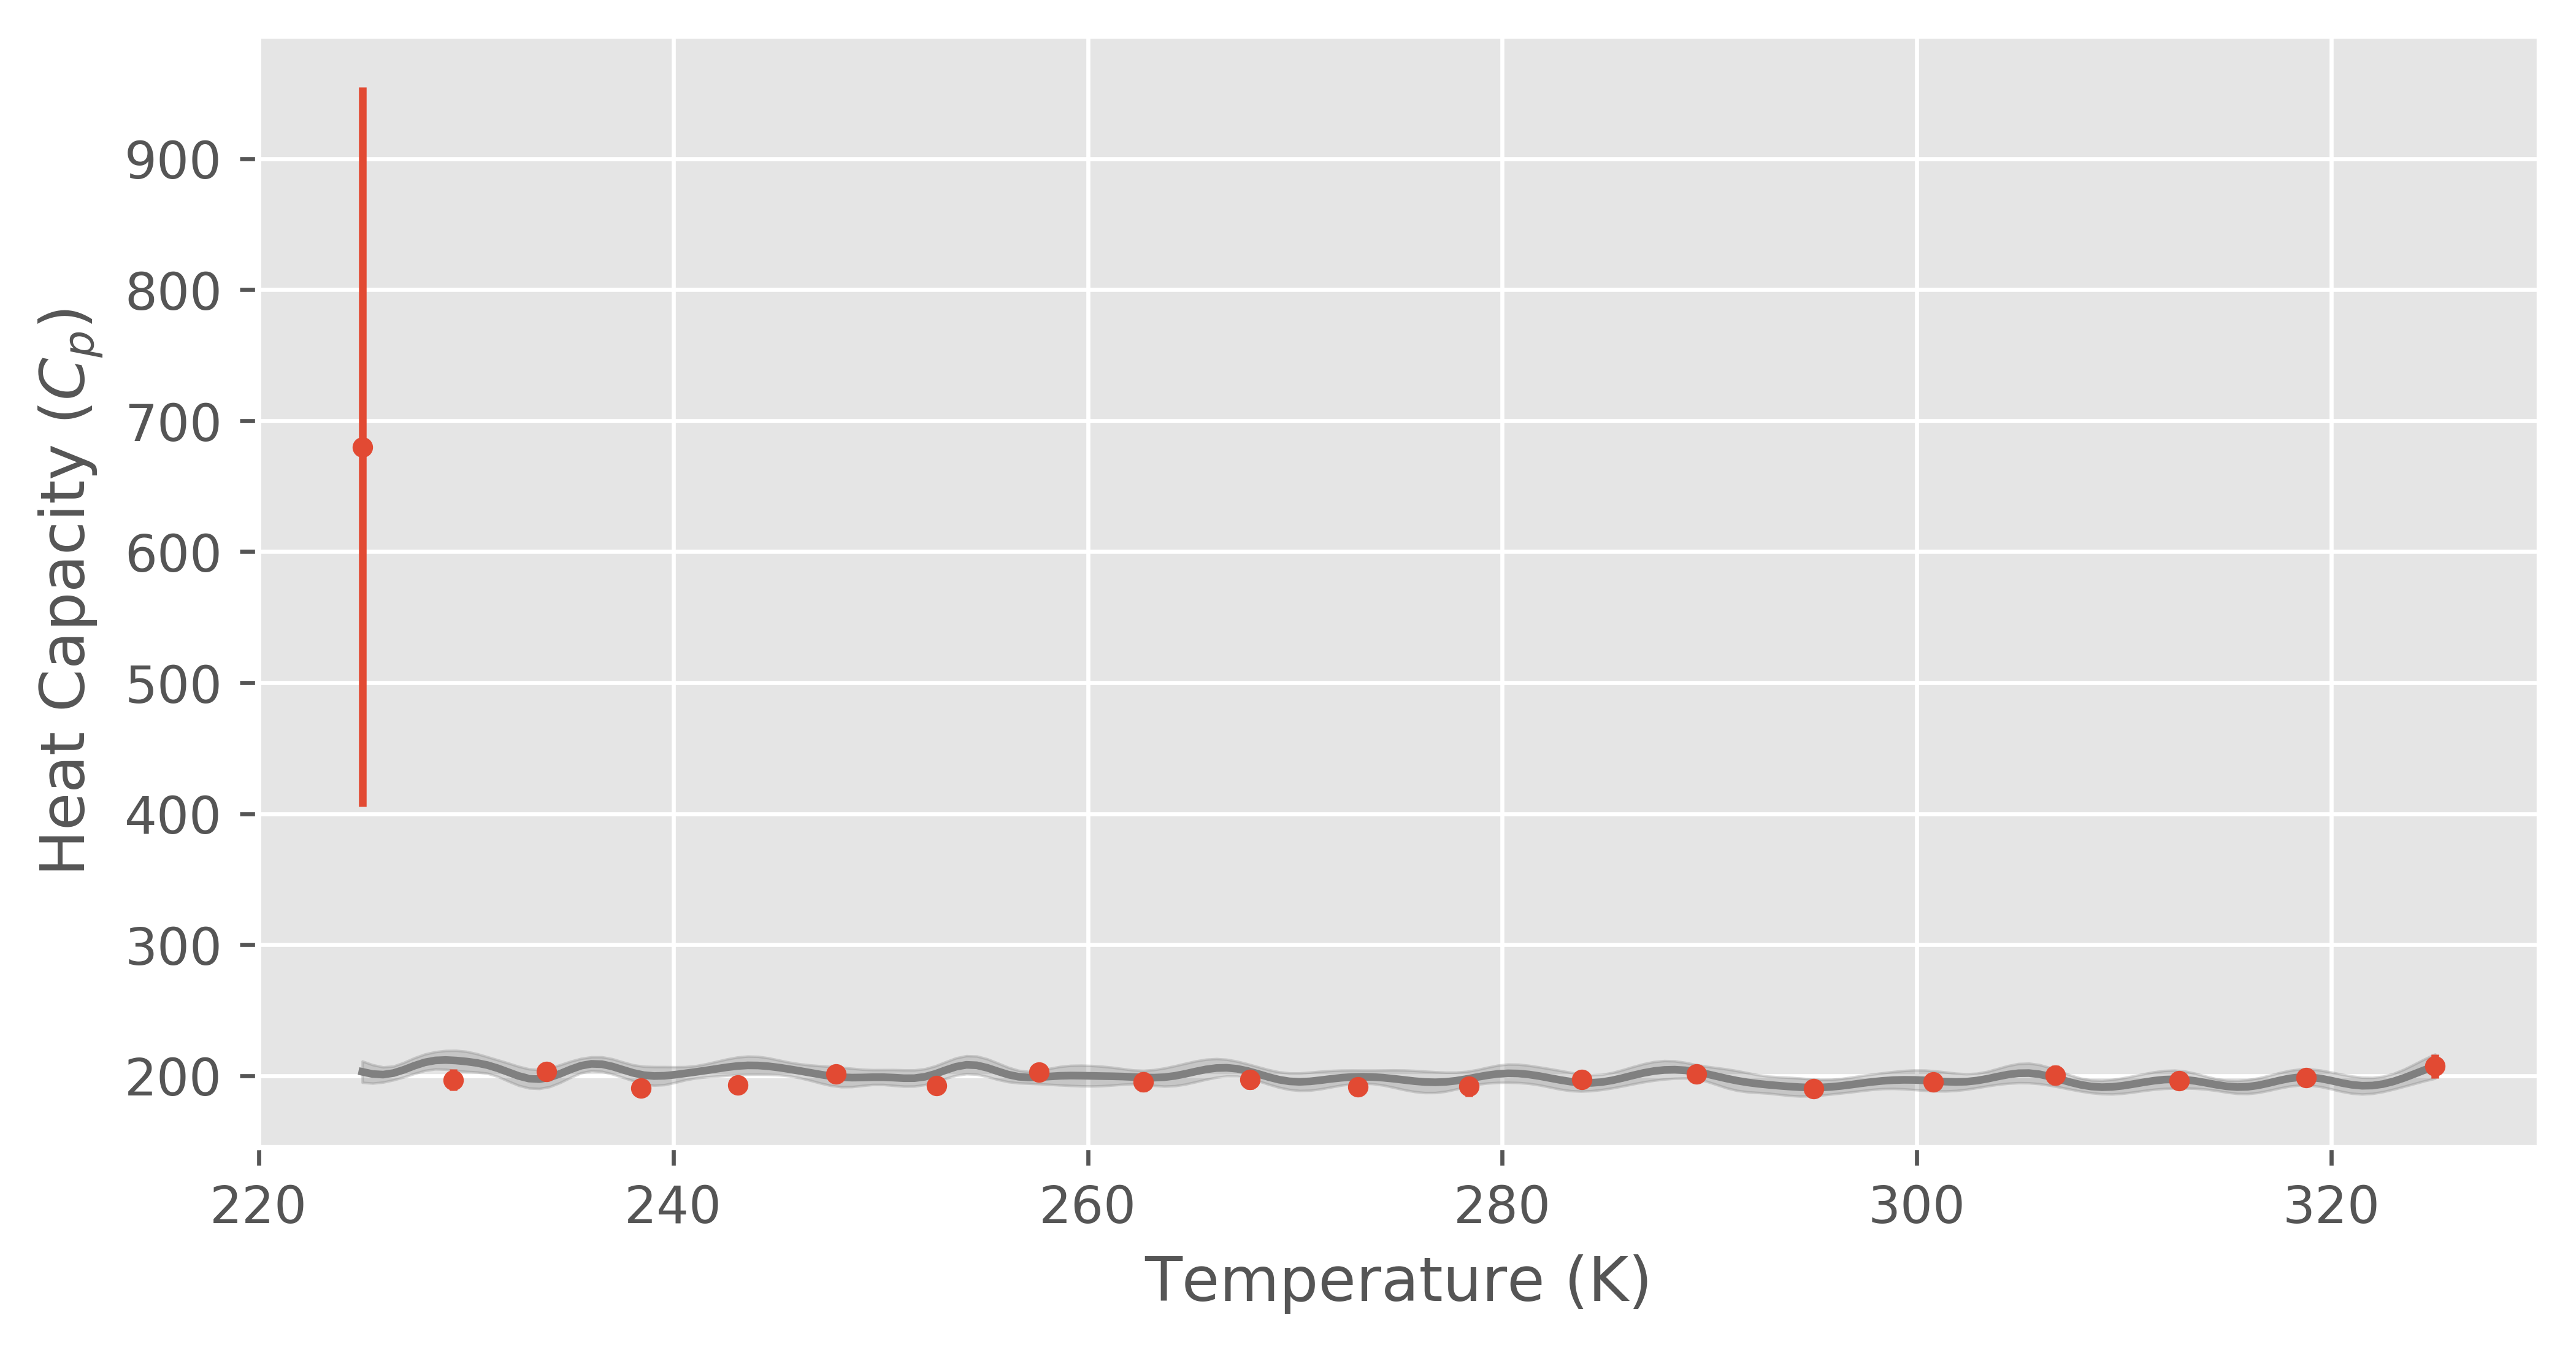

In [71]:
plt.figure(figsize=[8,4], dpi=600)
plt.plot(t_list[20:], mu_cp_boot[20:], color = "gray")
plt.fill_between(t_list[20:], mu_cp_boot[20:]-2*sigma_cp_boot[20:],  mu_cp_boot[20:]+2*sigma_cp_boot[20:], color="gray", alpha = 0.3)
plt.scatter(t_list[:20], mu_cp_boot[:20], color = "red", s = 5)
plt.errorbar(t_list[:20], mu_cp_boot[:20], yerr=2*sigma_cp_boot[:20], fmt=".")
plt.ylabel("Heat Capacity ($C_p$)")
plt.xlabel("Temperature (K)")



In [56]:
import time
N_boots = 100

Cp_boot = []

for j in range(N_boots):
    print("Working on bootstrap", j,"...")
    t1 = time.time()
    energies_boot = []
    for i in range(len(energies)):
        energies_boot.append(np.random.choice(energies[i], size=len(energies[i])))
    # Solve MBAR equations
    u_kln_boot, n_samples_boot, t_list_boot, betas_boot = analysis_library.construct_u_kln_matrix(temps, energies_boot, add_temps = np.linspace(230, 325, 200))
    mbar_boot = pymbar.MBAR(u_kln_boot, n_samples_boot, verbose = False, relative_tolerance = 1e-10, initial_f_k= None, maximum_iterations=1000)
    # Compute expectations and variance of relevant terms
    E_kln_boot = u_kln_boot
    for k in range(u_kln_boot.shape[1]):
        E_kln_boot[:,k,:] *= betas_boot[k]**(-1)
    results = mbar_boot.computeExpectations(E_kln_boot, state_dependent=True, return_dict=True)
    E_expected = results['mu']
    results = mbar_boot.computeExpectations(E_kln_boot**2, state_dependent=True, return_dict=True)
    E2_expected = results['mu']
    # compute boot strap cp
    t2 = time.time()
    print("bootstraj", j, "took", t2-t1, "seconds")
    Cp_boot.append((E2_expected - (E_expected*E_expected)) / (kb * t_list**2))

Working on bootstrap 0 ...
bootstraj 0 took 6.581605672836304 seconds
Working on bootstrap 1 ...
bootstraj 1 took 6.61978554725647 seconds
Working on bootstrap 2 ...
bootstraj 2 took 6.662371397018433 seconds
Working on bootstrap 3 ...
bootstraj 3 took 6.57904839515686 seconds
Working on bootstrap 4 ...
bootstraj 4 took 6.692340135574341 seconds
Working on bootstrap 5 ...
bootstraj 5 took 6.597877264022827 seconds
Working on bootstrap 6 ...
bootstraj 6 took 6.616494417190552 seconds
Working on bootstrap 7 ...
bootstraj 7 took 6.707784414291382 seconds
Working on bootstrap 8 ...
bootstraj 8 took 6.91637110710144 seconds
Working on bootstrap 9 ...
bootstraj 9 took 6.795192718505859 seconds
Working on bootstrap 10 ...
bootstraj 10 took 7.214479923248291 seconds
Working on bootstrap 11 ...
bootstraj 11 took 6.750678777694702 seconds
Working on bootstrap 12 ...
bootstraj 12 took 6.9948413372039795 seconds
Working on bootstrap 13 ...
bootstraj 13 took 6.792402267456055 seconds
Working on boo

bootstraj 18 took 6.6591198444366455 seconds
Working on bootstrap 19 ...
bootstraj 19 took 6.681480169296265 seconds
Working on bootstrap 20 ...
bootstraj 20 took 6.656824588775635 seconds
Working on bootstrap 21 ...
bootstraj 21 took 6.672530651092529 seconds
Working on bootstrap 22 ...
bootstraj 22 took 6.747023820877075 seconds
Working on bootstrap 23 ...
bootstraj 23 took 6.7030229568481445 seconds
Working on bootstrap 24 ...


KeyboardInterrupt: 